In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
flight_delays_df_23 = pd.read_csv("/Users/rezanaiman/Desktop/Fall 2024/Stat captson/ICR project/Illinois_10_years_data.csv")

In [3]:
flight_delays_df_23.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Origin_State_Name,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1.0,2.0,AA,N359AA,13930.0,ORD,Illinois,...,260.0,15.0,0.0,30.0,1014.2,10.0,SCT,22000.0,40.28,0.0
1,2014,2,4,1.0,2.0,AA,N3ADAA,13930.0,ORD,Illinois,...,260.0,24.0,0.0,30.0,1008.9,10.0,SCT,2800.0,20.44,0.0
2,2014,2,4,1.0,2.0,AA,N3AKAA,13930.0,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,SCT,4300.0,55.04,0.0
3,2014,2,4,1.0,2.0,AA,N3AKAA,13930.0,ORD,Illinois,...,250.0,20.0,0.0,30.0,1011.5,10.0,OVC,2600.0,21.74,0.0
4,2014,2,4,1.0,2.0,AA,N3ANAA,13930.0,ORD,Illinois,...,220.0,15.0,0.0,30.0,1004.2,10.0,CLR,4700.0,55.26,0.0


In [4]:
flight_delays_df_23.shape

(2969937, 31)

In [5]:
flight_delays_df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 31 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int64  
 1   Quarter                           int64  
 2   Month                             int64  
 3   Day_of_Month                      float64
 4   Day_of_Week                       float64
 5   Operating_Carrier_Code            object 
 6   Tail_Number                       object 
 7   Origin_Airport_ID                 float64
 8   Origin_Airport_Code               object 
 9   Origin_State_Name                 object 
 10  Destination_Airport_Code          object 
 11  Destination_State_Name            object 
 12  Scheduled_Departure_Time          float64
 13  Departure_Delay_Minutes           float64
 14  Taxi_Out_Time_Minutes             float64
 15  Flight_Distance_Miles             float64
 16  Departure_Datetime                ob

In [6]:
nasum = flight_delays_df_23.isna().sum()
print(nasum)

Year                                0
Quarter                             0
Month                               0
Day_of_Month                        0
Day_of_Week                         0
Operating_Carrier_Code              0
Tail_Number                         0
Origin_Airport_ID                   0
Origin_Airport_Code                 0
Origin_State_Name                   0
Destination_Airport_Code            0
Destination_State_Name              0
Scheduled_Departure_Time            0
Departure_Delay_Minutes             0
Taxi_Out_Time_Minutes               0
Flight_Distance_Miles               0
Departure_Datetime                  0
Scheduled_Departure_Time_Minutes    0
Air_Temperature_Fahrenheit          0
Dew_Point_Temperature_Fahrenheit    0
Relative_Humidity_Percent           0
Wind_Direction_Degrees              0
Wind_Speed_Knots                    0
Hourly_Precipitation_Inches         0
Pressure_Altimeter_Inches           0
Sea_Level_Pressure_Millibar         0
Visibility_M

We have no na values which is really good! Now I want to focus on the data from year 2023.

In [7]:
Il_flights_df_23 = flight_delays_df_23[flight_delays_df_23["Year"] == 2023]

In [8]:
Il_flights_df_23.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Origin_State_Name,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
2644204,2023,2,4,1.0,6.0,9E,N340CA,13232.0,MDW,Illinois,...,200.0,19.0,0.007148,29.0,1006.9,10.0,BKN,1900.0,66.33,1.0
2644205,2023,2,4,1.0,6.0,9E,N376CA,13232.0,MDW,Illinois,...,200.0,19.0,0.006600,29.0,1006.9,10.0,BKN,1900.0,66.24,0.0
2644206,2023,2,4,1.0,6.0,9E,N376CA,13232.0,MDW,Illinois,...,200.0,18.0,0.008383,29.0,1006.9,10.0,BKN,1900.0,66.52,1.0
2644207,2023,2,4,1.0,6.0,9E,N376CA,13232.0,MDW,Illinois,...,200.0,19.0,0.007468,29.0,1006.9,10.0,BKN,1900.0,66.38,1.0
2644208,2023,2,4,1.0,6.0,9E,N655CA,13232.0,MDW,Illinois,...,200.0,18.0,0.008017,29.0,1006.9,10.0,BKN,1900.0,66.46,1.0


In [9]:
Il_flights_df_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300540 entries, 2644204 to 2944743
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Year                              300540 non-null  int64  
 1   Quarter                           300540 non-null  int64  
 2   Month                             300540 non-null  int64  
 3   Day_of_Month                      300540 non-null  float64
 4   Day_of_Week                       300540 non-null  float64
 5   Operating_Carrier_Code            300540 non-null  object 
 6   Tail_Number                       300540 non-null  object 
 7   Origin_Airport_ID                 300540 non-null  float64
 8   Origin_Airport_Code               300540 non-null  object 
 9   Origin_State_Name                 300540 non-null  object 
 10  Destination_Airport_Code          300540 non-null  object 
 11  Destination_State_Name            300540 non-

Since there are no na values, the next thing we want to find which variables are mostly correlated with the Target variable and further analyze those features. For an easier visulization I will subset the data into flight and weather and plot a correlation plot. 

In [10]:
Il_flights_weather_23 = Il_flights_df_23.iloc[:, 18:31]


In [11]:
Il_flights_weather_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300540 entries, 2644204 to 2944743
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Air_Temperature_Fahrenheit        300540 non-null  float64
 1   Dew_Point_Temperature_Fahrenheit  300540 non-null  float64
 2   Relative_Humidity_Percent         300540 non-null  float64
 3   Wind_Direction_Degrees            300540 non-null  float64
 4   Wind_Speed_Knots                  300540 non-null  float64
 5   Hourly_Precipitation_Inches       300540 non-null  float64
 6   Pressure_Altimeter_Inches         300540 non-null  float64
 7   Sea_Level_Pressure_Millibar       300540 non-null  float64
 8   Visibility_Miles                  300540 non-null  float64
 9   Sky_Cover_Level_1                 300540 non-null  object 
 10  Sky_Level_1_Altitude_Feet         300540 non-null  float64
 11  Apparent_Temperature_Fahrenheit   300540 non-

Our code worked and we have only have a weather data. We will apply a similar technique to flight data!

In [12]:
Il_flights_flight_23 = Il_flights_df_23.iloc[:, np.r_[0:18, 30]]

In [13]:
Il_flights_flight_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300540 entries, 2644204 to 2944743
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Year                              300540 non-null  int64  
 1   Quarter                           300540 non-null  int64  
 2   Month                             300540 non-null  int64  
 3   Day_of_Month                      300540 non-null  float64
 4   Day_of_Week                       300540 non-null  float64
 5   Operating_Carrier_Code            300540 non-null  object 
 6   Tail_Number                       300540 non-null  object 
 7   Origin_Airport_ID                 300540 non-null  float64
 8   Origin_Airport_Code               300540 non-null  object 
 9   Origin_State_Name                 300540 non-null  object 
 10  Destination_Airport_Code          300540 non-null  object 
 11  Destination_State_Name            300540 non-

Perfect, now we have a subset of data for flight and weather. Now we can make a correlation plot to which are most correlated with our Target variable and to see if there are any multicolineairty issues. 

In [14]:
weather_cor_matrix = Il_flights_weather_23.corr()
flight_cor_matrix  = Il_flights_flight_23.corr()

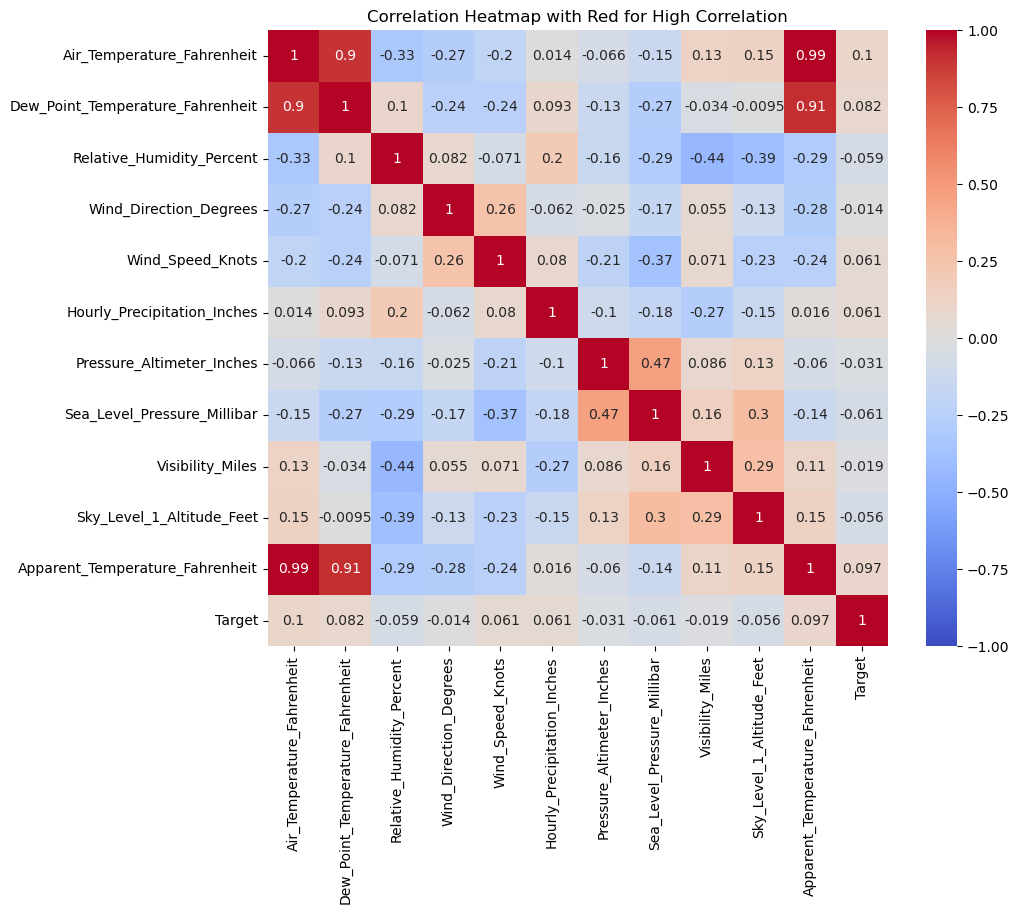

In [15]:
plt.figure(figsize=(10, 8))
weather_heat_map_cor_matrix = sns.heatmap(
    weather_cor_matrix, 
    cmap="coolwarm", # or "RdYlGn" for a red-to-green scale
    annot=True,      # Display correlation values
    vmin=-1, vmax=1  # Set scale to cover full correlation range
)
plt.title("Correlation Heatmap with Red for High Correlation")
plt.show()

In [16]:
weather_cor_matrix

,Air_Temperature_Fahrenheit,Dew_Point_Temperature_Fahrenheit,Relative_Humidity_Percent,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
Air_Temperature_Fahrenheit,1.000000,0.903786,-0.326364,-0.266998,-0.197131,0.013803,-0.065969,-0.145154,0.129446,0.147858,0.994324,0.104255
Dew_Point_Temperature_Fahrenheit,0.903786,1.000000,0.101450,-0.238829,-0.238748,0.093316,-0.134145,-0.271646,-0.033632,-0.009507,0.914761,0.081951
Relative_Humidity_Percent,-0.326364,0.101450,1.000000,0.081567,-0.070588,0.196312,-0.155176,-0.286417,-0.444810,-0.391998,-0.289694,-0.058927
Wind_Direction_Degrees,-0.266998,-0.238829,0.081567,1.000000,0.259610,-0.062346,-0.024752,-0.167915,0.055241,-0.128040,-0.278814,-0.013610
Wind_Speed_Knots,-0.197131,-0.238748,-0.070588,0.259610,1.000000,0.079811,-0.213328,-0.369320,0.071063,-0.234622,-0.239322,0.060597
Hourly_Precipitation_Inches,0.013803,0.093316,0.196312,-0.062346,0.079811,1.000000,-0.101889,-0.175242,-0.268780,-0.153766,0.016202,0.061057
Pressure_Altimeter_Inches,-0.065969,-0.134145,-0.155176,-0.024752,-0.213328,-0.101889,1.000000,0.468241,0.085578,0.129056,-0.060106,-0.030654
Sea_Level_Pressure_Millibar,-0.145154,-0.271646,-0.286417,-0.167915,-0.369320,-0.175242,0.468241,1.000000,0.156432,0.297522,-0.136124,-0.061063
Visibility_Miles,0.129446,-0.033632,-0.444810,0.055241,0.071063,-0.268780,0.085578,0.156432,1.000000,0.287992,0.109813,-0.018706
Sky_Level_1_Altitude_Feet,0.147858,-0.009507,-0.391998,-0.128040,-0.234622,-0.153766,0.129056,0.297522,0.287992,1.000000,0.147227,-0.056413


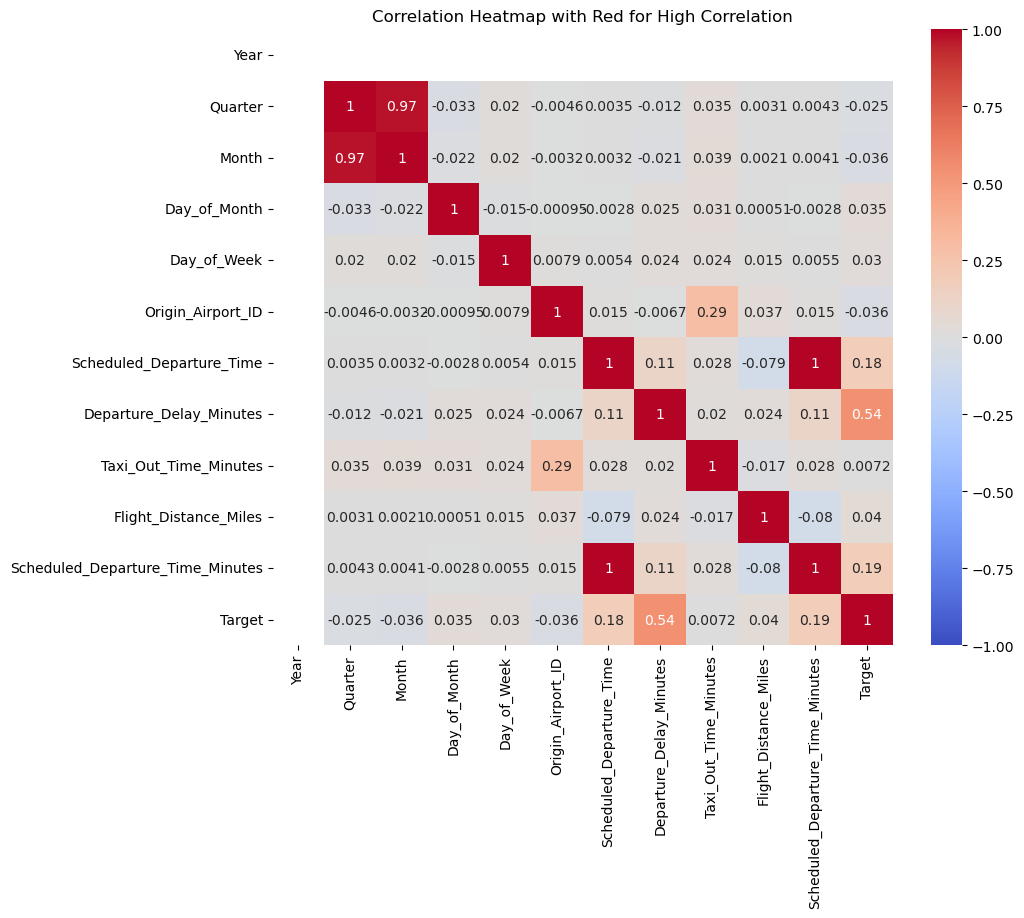

In [17]:
plt.figure(figsize=(10, 8))
flight_heat_map_cor_matrix = sns.heatmap(
    flight_cor_matrix, 
    cmap="coolwarm", # or "RdYlGn" for a red-to-green scale
    annot=True,      # Display correlation values
    vmin=-1, vmax=1  # Set scale to cover full correlation range
)
plt.title("Correlation Heatmap with Red for High Correlation")
plt.show()

In [18]:
flight_cor_matrix

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Origin_Airport_ID,Scheduled_Departure_Time,Departure_Delay_Minutes,Taxi_Out_Time_Minutes,Flight_Distance_Miles,Scheduled_Departure_Time_Minutes,Target
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarter,NaN,1.000000,0.969158,-0.033198,0.020112,-0.004573,0.003456,-0.012219,0.034621,0.003054,0.004259,-0.024547
Month,NaN,0.969158,1.000000,-0.021565,0.019664,-0.003212,0.003236,-0.021033,0.039288,0.002149,0.004085,-0.036114
Day_of_Month,NaN,-0.033198,-0.021565,1.000000,-0.014573,-0.000948,-0.002777,0.025202,0.031358,0.000507,-0.002809,0.034506
Day_of_Week,NaN,0.020112,0.019664,-0.014573,1.000000,0.007855,0.005409,0.024433,0.024240,0.014633,0.005463,0.029552
Origin_Airport_ID,NaN,-0.004573,-0.003212,-0.000948,0.007855,1.000000,0.014781,-0.006688,0.289397,0.037167,0.014603,-0.036138
Scheduled_Departure_Time,NaN,0.003456,0.003236,-0.002777,0.005409,0.014781,1.000000,0.111501,0.027761,-0.079172,0.999684,0.184960
Departure_Delay_Minutes,NaN,-0.012219,-0.021033,0.025202,0.024433,-0.006688,0.111501,1.000000,0.020196,0.023536,0.111738,0.541790
Taxi_Out_Time_Minutes,NaN,0.034621,0.039288,0.031358,0.024240,0.289397,0.027761,0.020196,1.000000,-0.016998,0.027689,0.007228
Flight_Distance_Miles,NaN,0.003054,0.002149,0.000507,0.014633,0.037167,-0.079172,0.023536,-0.016998,1.000000,-0.080053,0.039838


Based on our correlation plots, the following plots are mosly correlated with our Target variable.

From the weather variables: 
* Apparent_Temperature_Fahrenheit : 0.097
* Hourly_Precipitation_Inches     : 0.061
* Wind_Speed_Knots                : 0.061
* Dew_Point_Temperature_Fahrenheit: 0.082
* Air_Temperature_Fahrenheit      : 0.1


From the flight variables: 

* Scheduled_Departure_Time_Minutes:  0.19
* Flight_Distance_Miles           :  0.04
* Departure_Delay_Minutes         :  0.54
* Scheduled_Departure_Time        :  0.18
* Day_of_Week                     :  0.03
* Day_of_Month                    :  0.035


We will start our analysis with the most correlated variables and how it performs. If needed, we will add it the least correlated variables later. Also we need to check for any outliers, we will use boxplots to check for outliers.

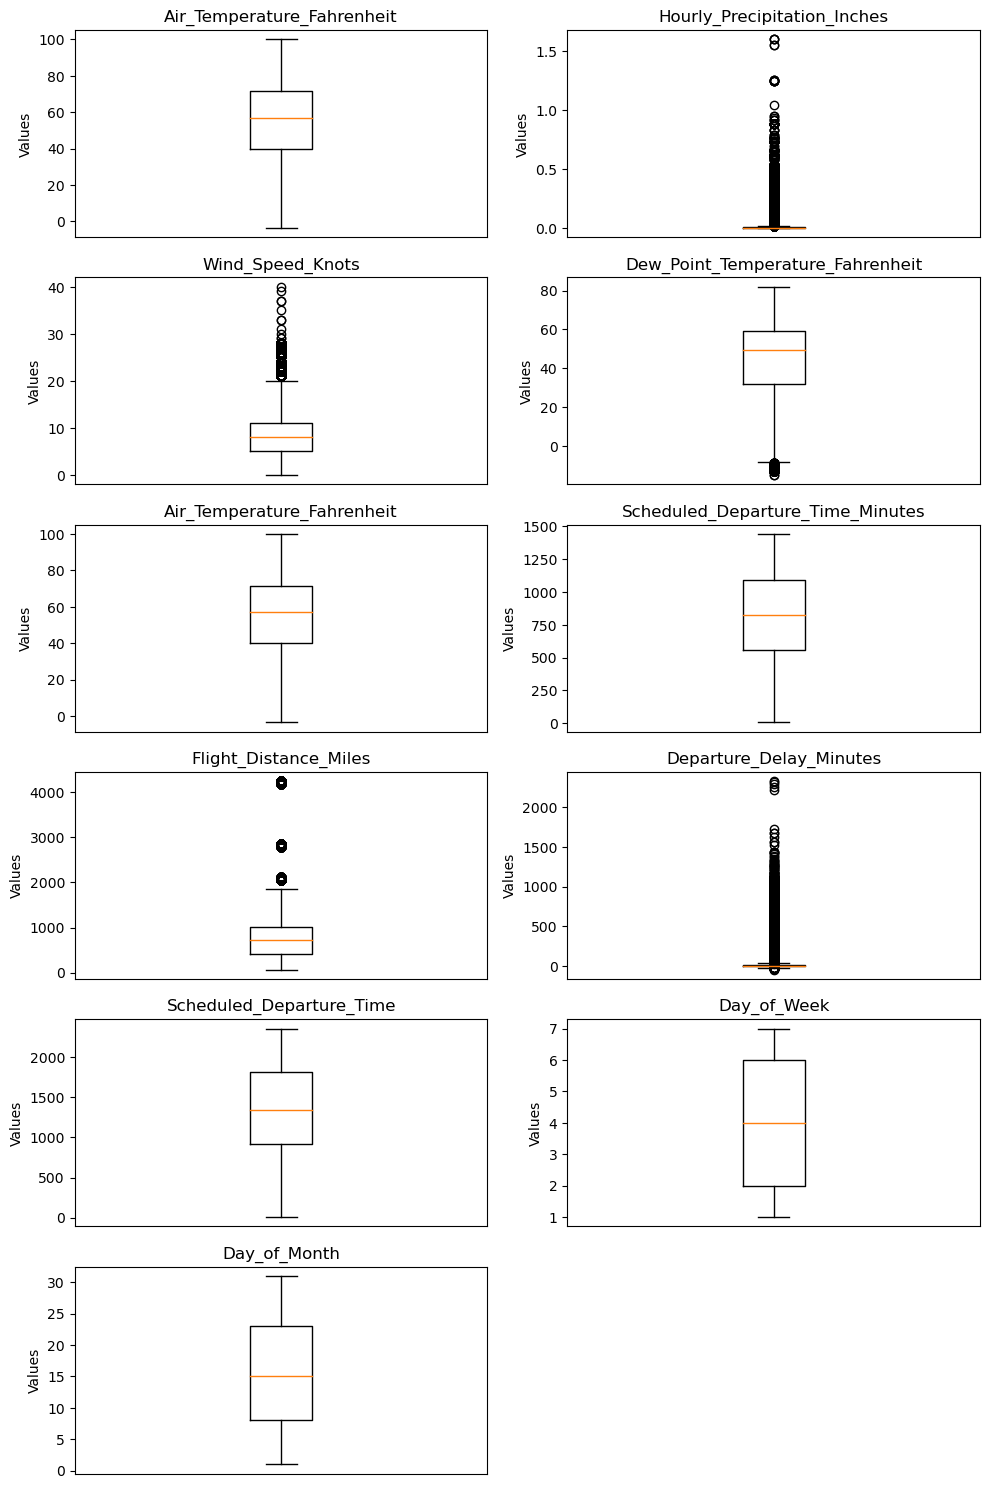

In [19]:
import matplotlib.pyplot as plt

variables = [
    "Air_Temperature_Fahrenheit",
    "Hourly_Precipitation_Inches",
    "Wind_Speed_Knots",
    "Dew_Point_Temperature_Fahrenheit",
    "Air_Temperature_Fahrenheit",
    "Scheduled_Departure_Time_Minutes",
    "Flight_Distance_Miles",
    "Departure_Delay_Minutes",
    "Scheduled_Departure_Time",
    "Day_of_Week",
    "Day_of_Month"
]

n_rows = 6
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))  # Adjust size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each variable in a separate subplot
for ax, var in zip(axes, variables):
    ax.boxplot(Il_flights_df_23[var])
    ax.set_title(var)
    ax.set_ylabel("Values")
    ax.set_xticks([])  # Optional: remove x ticks for clarity

# Hide any unused subplots (if there are fewer than 12 variables)
for i in range(len(variables), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

There are many outliers in Departure Delay Minutes, Flight Distance Miles, Wind Speed Knots, and Hourly Precipitation Inches. We need to keep these in minds as we train and test our algorithims.

Our first analysis is to perform a decision tree(a versatile machine learning algorithim) one with the weather data, one with flight and one a combination of all.

In [20]:

columns_to_keep = [
    "Air_Temperature_Fahrenheit",
    "Hourly_Precipitation_Inches",
    "Wind_Speed_Knots",
    "Dew_Point_Temperature_Fahrenheit",
    "Target"  
]



final_weather_df_23 = Il_flights_df_23[columns_to_keep]
print(final_weather_df_23.head(5))
final_weather_df_23.info()


         Air_Temperature_Fahrenheit  Hourly_Precipitation_Inches  \
2644204                   66.330520                     0.007148   
2644205                   66.246132                     0.006600   
2644206                   66.520394                     0.008383   
2644207                   66.379747                     0.007468   
2644208                   66.464135                     0.008017   

         Wind_Speed_Knots  Dew_Point_Temperature_Fahrenheit  Target  
2644204              19.0                         60.933896     1.0  
2644205              19.0                         60.950774     0.0  
2644206              18.0                         60.895921     1.0  
2644207              19.0                         60.924051     1.0  
2644208              18.0                         60.907173     1.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300540 entries, 2644204 to 2944743
Data columns (total 5 columns):
 #   Column                            Non-Null Count 

In [21]:

from sklearn.model_selection import train_test_split



X_train_weather, X_temp_weather, y_train_weather, y_temp_weather = train_test_split(final_weather_df_23.drop('Target', axis=1), final_weather_df_23['Target'], test_size=0.3, random_state=24)


X_train_weather, X_val_weather, y_train_weather, y_val_weather = train_test_split(X_train_weather, y_train_weather, test_size=0.1/0.7, random_state=42)


In [22]:
print("The training set for features: ", X_train_weather.shape)
print("The testing set for features", X_temp_weather.shape)
print("The training for Target (flight delays)", y_train_weather.shape)
print("The testing for Target (flight delays)", y_temp_weather.shape)


The training set for features:  (180323, 4)
The testing set for features (90162, 4)
The training for Target (flight delays) (180323,)
The testing for Target (flight delays) (90162,)


In [23]:
X_train_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180323 entries, 2870833 to 2779208
Data columns (total 4 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Air_Temperature_Fahrenheit        180323 non-null  float64
 1   Hourly_Precipitation_Inches       180323 non-null  float64
 2   Wind_Speed_Knots                  180323 non-null  float64
 3   Dew_Point_Temperature_Fahrenheit  180323 non-null  float64
dtypes: float64(4)
memory usage: 6.9 MB


In [24]:
from sklearn import tree
clf_weather = tree.DecisionTreeClassifier(max_depth = 3)
clf_weather.fit(X_train_weather, y_train_weather)

DecisionTreeClassifier(max_depth=3)

I tried max_depth 5 but it was hard to intrepret as the text was very hard to read. Then I tried 4, and it was still very hard, 3 is the most readable one. 

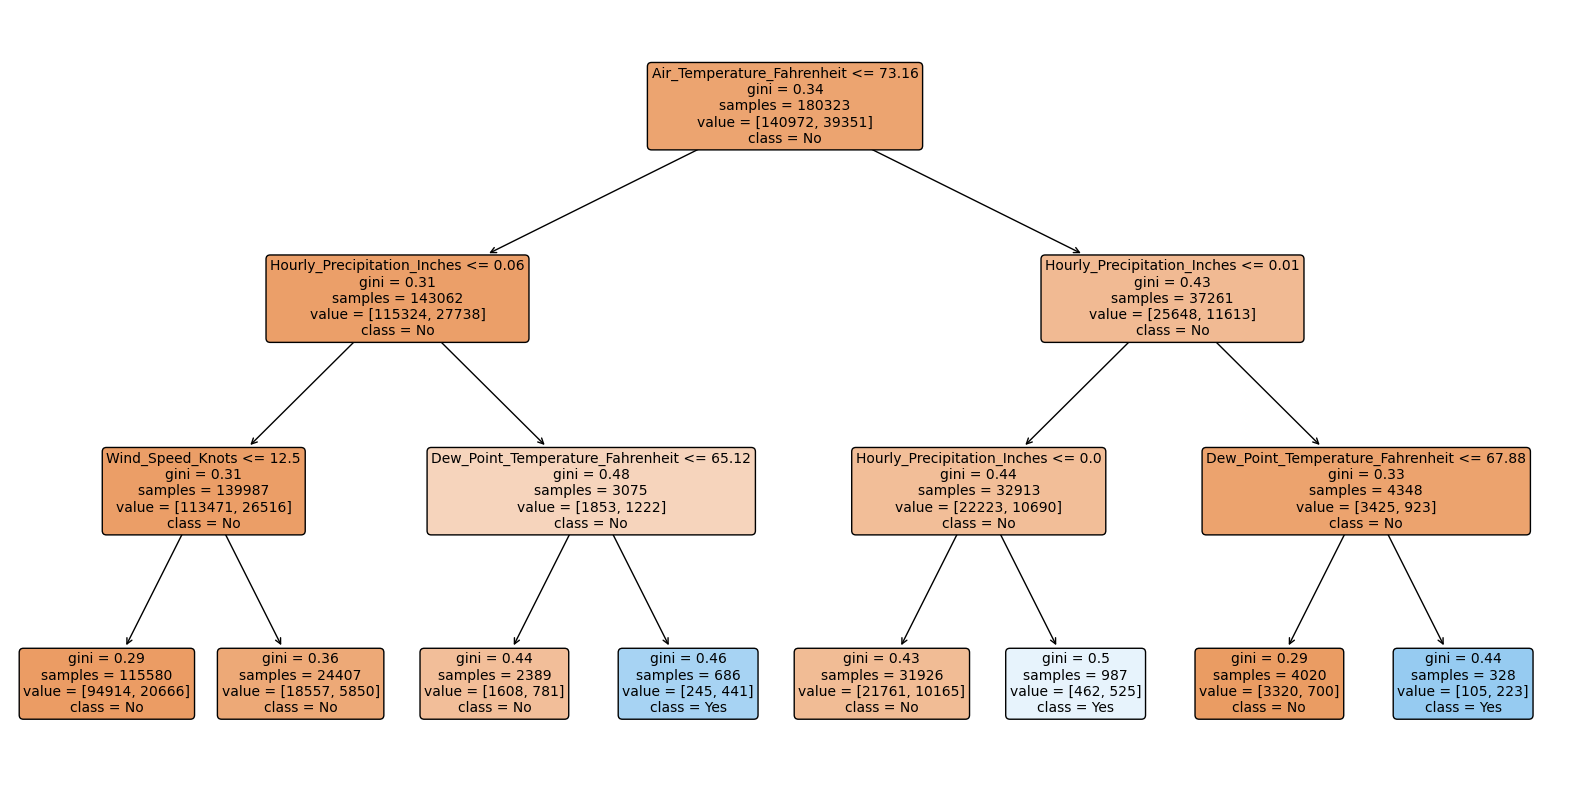

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Increase the figure size for better readability
plot_tree(
    clf_weather,               # Your trained decision tree model
    filled=True,               # Color the nodes based on the class or value they predict
    feature_names=X_train_weather.columns,  # Use descriptive feature names
    class_names=['No', 'Yes'],  # Class names (replace with your actual class names)
    rounded=True,              # Round the boxes for better visualization
    precision=2,               # Number of decimal places to use for floats
    fontsize=10                # Set a font size for readability
)
plt.show()


In [26]:
feature_importances = pd.DataFrame({
    'Feature': X_train_weather.columns,
    'Importance': clf_weather.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
0        Air_Temperature_Fahrenheit    0.489370
1       Hourly_Precipitation_Inches    0.265435
3  Dew_Point_Temperature_Fahrenheit    0.156055
2                  Wind_Speed_Knots    0.089141


In this Decision Tree only using the highly correlated values we see that Air_Temperature_Fahrenheit is the most important followed 
by, Hourly_Precipitation_Inches, Dew_Point_Temperature_Fahrenheit.

Let's do the same algorithim but only for flight data. 

In [27]:
columns_to_keep = [
    "Scheduled_Departure_Time_Minutes",
    "Flight_Distance_Miles",
    "Departure_Delay_Minutes",
    "Scheduled_Departure_Time",
    "Day_of_Week",
    "Day_of_Month", 
    "Target"
]



final_flight_df_23 = Il_flights_df_23[columns_to_keep]
print(final_flight_df_23.head(5))

         Scheduled_Departure_Time_Minutes  Flight_Distance_Miles  \
2644204                             755.0                  228.0   
2644205                             574.0                  349.0   
2644206                            1149.0                  349.0   
2644207                             861.0                  349.0   
2644208                            1035.0                  228.0   

         Departure_Delay_Minutes  Scheduled_Departure_Time  Day_of_Week  \
2644204                    196.0                    1235.0          6.0   
2644205                     -5.0                     934.0          6.0   
2644206                     51.0                    1909.0          6.0   
2644207                     17.0                    1421.0          6.0   
2644208                     73.0                    1715.0          6.0   

         Day_of_Month  Target  
2644204           1.0     1.0  
2644205           1.0     0.0  
2644206           1.0     1.0  
2644207     

In [28]:
X_train_flight, X_temp_flight, y_train_flight, y_temp_flight = train_test_split(final_flight_df_23.drop('Target', axis=1), final_flight_df_23['Target'], test_size=0.3, random_state=24)


X_train_flight, X_val_flight, y_train_flight, y_val_flight = train_test_split(X_train_flight, y_train_flight, test_size=0.1/0.7, random_state=42)

print("The training set for features: ", X_train_flight.shape)
print("The testing set for features", X_temp_flight.shape)
print("The training for Target (flight delays)", y_train_flight.shape)
print("The testing for Target (flight delays)", y_temp_flight.shape)


The training set for features:  (180323, 6)
The testing set for features (90162, 6)
The training for Target (flight delays) (180323,)
The testing for Target (flight delays) (90162,)


In [29]:
clf_flight = tree.DecisionTreeClassifier(max_depth = 5)
clf_flight.fit(X_train_flight, y_train_flight)

DecisionTreeClassifier(max_depth=5)

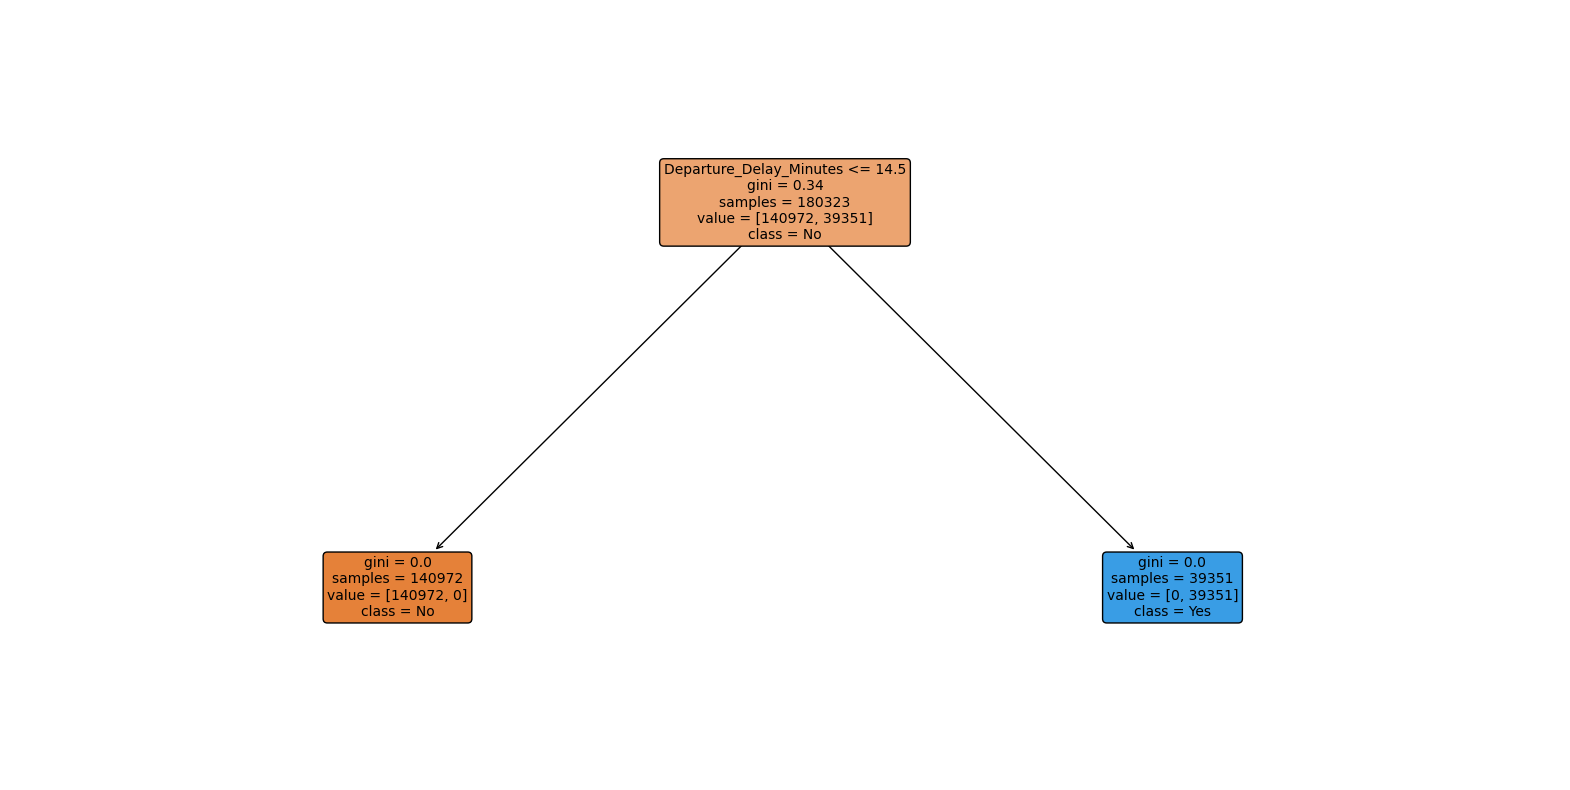

In [30]:
plt.figure(figsize=(20, 10))  
plot_tree(
    clf_flight,               
    filled=True,              
    feature_names=X_train_flight.columns, 
    class_names=['No', 'Yes'], 
    rounded=True,              
    precision=2,               
    fontsize=10    
)
plt.show()

In [31]:
feature_importances_flight = pd.DataFrame({
    'Feature': X_train_flight.columns,
    'Importance': clf_flight.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances_flight)


                            Feature  Importance
2           Departure_Delay_Minutes         1.0
0  Scheduled_Departure_Time_Minutes         0.0
1             Flight_Distance_Miles         0.0
3          Scheduled_Departure_Time         0.0
4                       Day_of_Week         0.0
5                      Day_of_Month         0.0


Not very useful when we only use flight data, now how about using the combination of the data. Will that be better?

Let's see!!

In [57]:
columns_to_keep = [
    'Year', 'Quarter', 'Month', 'Day_of_Month', 'Day_of_Week', 'Origin_Airport_ID', 
    'Scheduled_Departure_Time', 'Departure_Delay_Minutes', 'Taxi_Out_Time_Minutes', 
    'Flight_Distance_Miles', 'Scheduled_Departure_Time_Minutes', 'Air_Temperature_Fahrenheit', 
    'Dew_Point_Temperature_Fahrenheit', 'Relative_Humidity_Percent', 'Wind_Direction_Degrees', 
    'Wind_Speed_Knots', 'Hourly_Precipitation_Inches', 'Pressure_Altimeter_Inches', 
    'Sea_Level_Pressure_Millibar', 'Visibility_Miles', 'Sky_Level_1_Altitude_Feet', 
    'Apparent_Temperature_Fahrenheit', 'Target'
]




Il_flights_df_23_final = Il_flights_df_23[columns_to_keep]
Il_flights_df_23_final.shape


(300540, 23)

In [58]:
X_train_mixed, X_temp_mixed, y_train_mixed, y_temp_mixed = train_test_split(Il_flights_df_23_final.drop('Target', axis=1), Il_flights_df_23_final['Target'], test_size=0.3, random_state=24)


X_train_mixed, X_val_mixed, y_train_mixed, y_val_mixed = train_test_split(X_train_mixed, y_train_mixed, test_size=0.1/0.7, random_state=42)


Now we are trying to use the combined data and run the decision tree. X_train_mixed refers to the combined data for IL flights in the year 2023.

In [59]:
X_train_mixed.shape


(180323, 22)

In [60]:
y_train_mixed.shape

(180323,)

In [64]:
clf_mixed = tree.DecisionTreeClassifier(max_depth = 10)
clf_mixed.fit(X_train_mixed, y_train_mixed)

DecisionTreeClassifier(max_depth=10)

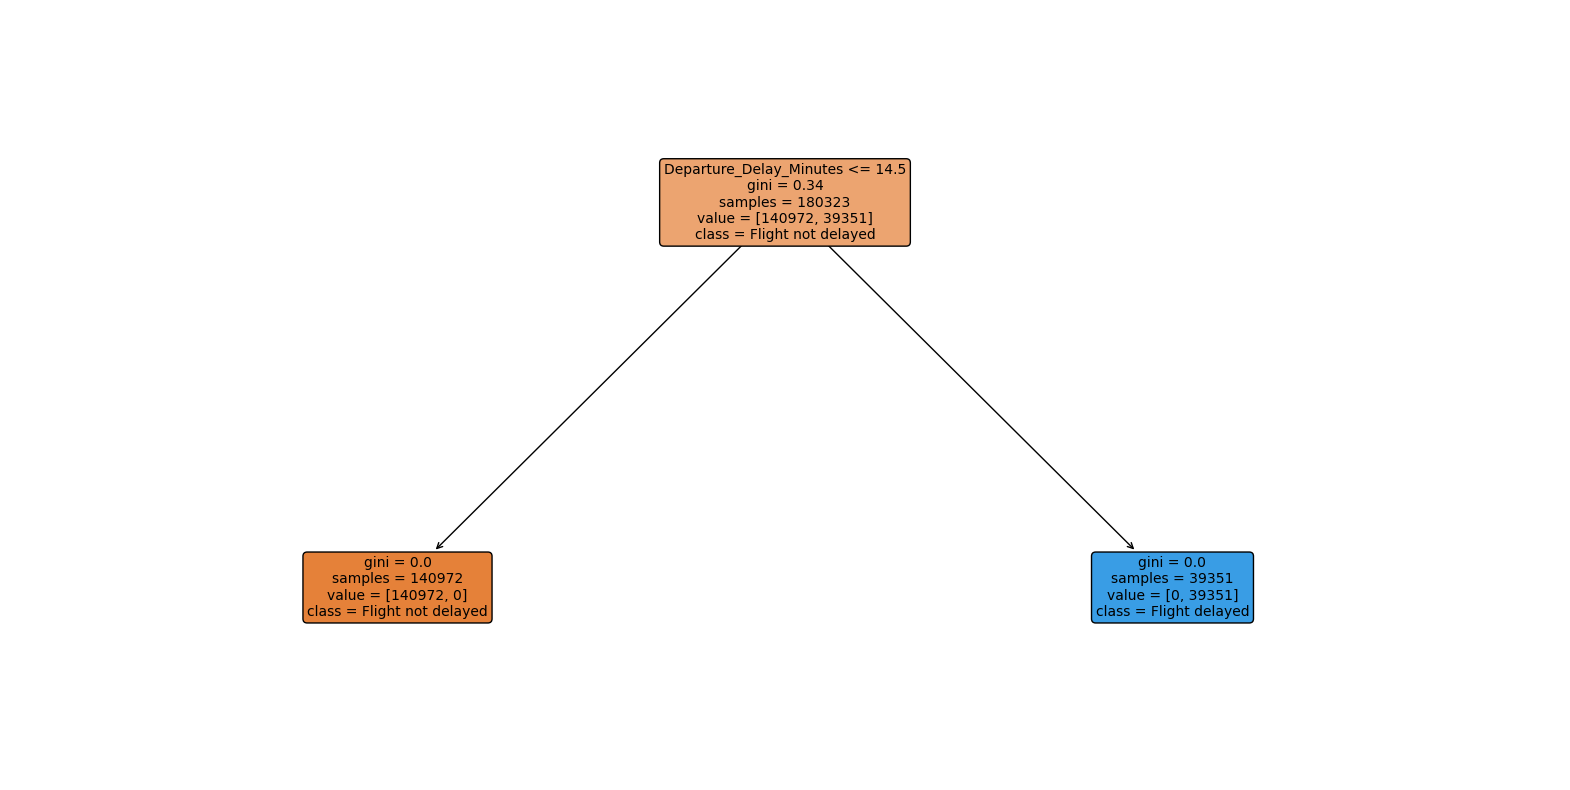

In [65]:
plt.figure(figsize=(20, 10))  
plot_tree(
    clf_mixed,               
    filled=True,              
    feature_names=X_train_mixed.columns, 
    class_names=['Flight not delayed', 'Flight delayed'], 
    rounded=True,              
    precision=2,               
    fontsize=10    
)
plt.show()

In [63]:
feature_importances_mixed = pd.DataFrame({
    'Feature': X_train_mixed.columns,
    'Importance': clf_mixed.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances_mixed)

                             Feature  Importance
7            Departure_Delay_Minutes         1.0
0                               Year         0.0
12  Dew_Point_Temperature_Fahrenheit         0.0
20         Sky_Level_1_Altitude_Feet         0.0
19                  Visibility_Miles         0.0
18       Sea_Level_Pressure_Millibar         0.0
17         Pressure_Altimeter_Inches         0.0
16       Hourly_Precipitation_Inches         0.0
15                  Wind_Speed_Knots         0.0
14            Wind_Direction_Degrees         0.0
13         Relative_Humidity_Percent         0.0
11        Air_Temperature_Fahrenheit         0.0
1                            Quarter         0.0
10  Scheduled_Departure_Time_Minutes         0.0
9              Flight_Distance_Miles         0.0
8              Taxi_Out_Time_Minutes         0.0
6           Scheduled_Departure_Time         0.0
5                  Origin_Airport_ID         0.0
4                        Day_of_Week         0.0
3                   

Running the Decision tree on a the whole data set did not perform well at all. This could be due to the imbalance between the two class within our target variable. We can check the distirbution of our Target variable with a simple bar plot. 

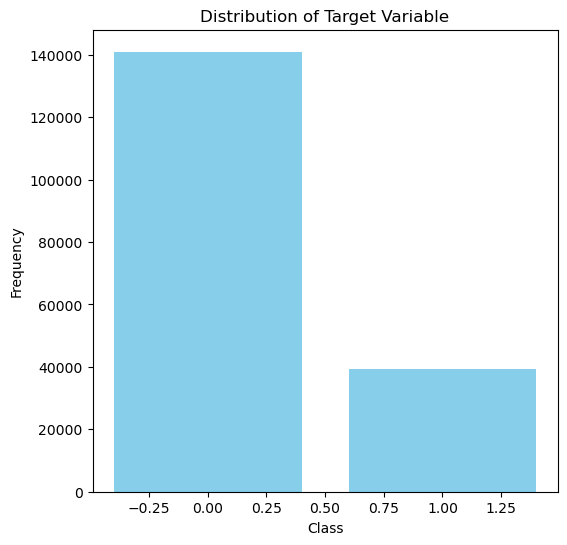

In [77]:
target_counts = y_train_mixed.value_counts()  

plt.figure(figsize=(6, 6))
plt.bar(target_counts.index, target_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

In [92]:
clf_mixed_1 = tree.DecisionTreeClassifier(max_depth=500, class_weight='balanced')
clf_mixed_1.fit(X_train_mixed, y_train_mixed)
y_pred = clf_mixed.predict(X_temp_mixed)


In [93]:
feature_importances_mixed_1 = pd.DataFrame({
    'Feature': X_train_mixed.columns,
    'Importance': clf_mixed_1.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances_mixed)

                             Feature  Importance
7            Departure_Delay_Minutes         1.0
0                               Year         0.0
12  Dew_Point_Temperature_Fahrenheit         0.0
20         Sky_Level_1_Altitude_Feet         0.0
19                  Visibility_Miles         0.0
18       Sea_Level_Pressure_Millibar         0.0
17         Pressure_Altimeter_Inches         0.0
16       Hourly_Precipitation_Inches         0.0
15                  Wind_Speed_Knots         0.0
14            Wind_Direction_Degrees         0.0
13         Relative_Humidity_Percent         0.0
11        Air_Temperature_Fahrenheit         0.0
1                            Quarter         0.0
10  Scheduled_Departure_Time_Minutes         0.0
9              Flight_Distance_Miles         0.0
8              Taxi_Out_Time_Minutes         0.0
6           Scheduled_Departure_Time         0.0
5                  Origin_Airport_ID         0.0
4                        Day_of_Week         0.0
3                   

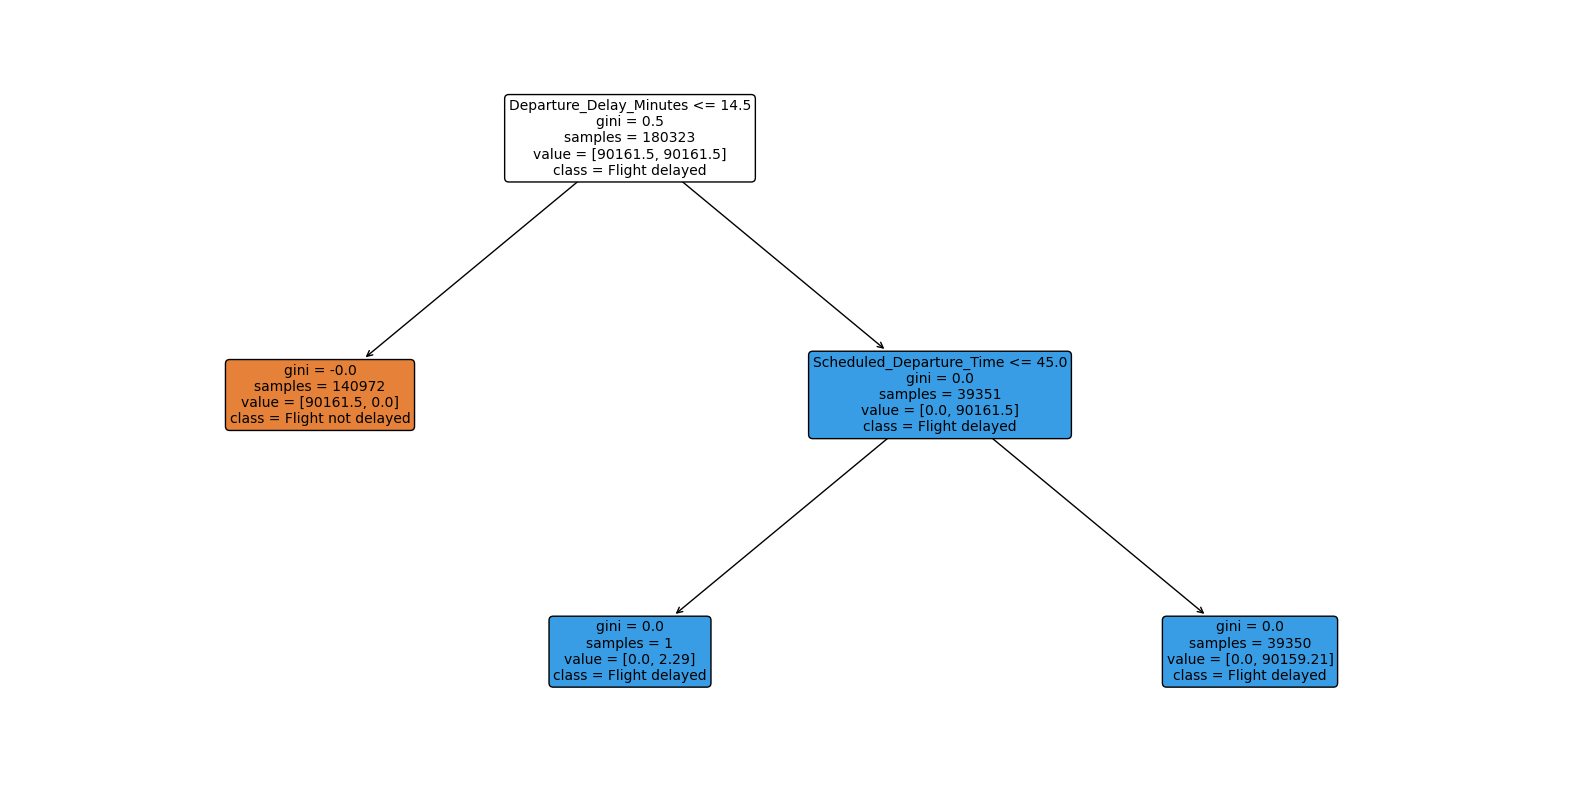

In [94]:
plt.figure(figsize=(20, 10))  
plot_tree(
    clf_mixed_1,               
    filled=True,              
    feature_names=X_train_mixed.columns, 
    class_names=['Flight not delayed', 'Flight delayed'], 
    rounded=True,              
    precision=2,               
    fontsize=10    
)
plt.show()

In [96]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_temp_mixed, y_pred)
print("The accuracy is: ", accuracy)

The accuracy is:  1.0


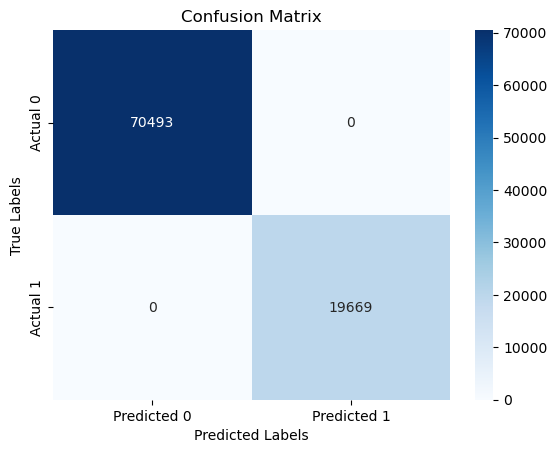

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_temp_mixed, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The decission tree did not too well. This needs to be further investigated and be compared to other models.